In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#Reading or importing data
df=pd.read_csv("Diwali Sales Data.csv", encoding='unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [10]:
df.shape

(11251, 15)

In [28]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610858
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355869
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int64 
dtypes: int64(5), object(8)
memory usage: 1.2+ MB


In [24]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [25]:
df["User_ID"].duplicated().sum()

7487

# Data Cleaning

In [19]:
#Deleting Blank Columns
df.drop(["Status","unnamed1"], axis=1, inplace=True)

In [23]:
#Drop Null Values
df.dropna(inplace=True)

In [38]:
# Change Data Type of the column amount
df["Amount"]=df["Amount"].astype("int64")

In [61]:
df["Amount"].dtypes

dtype('int64')

In [62]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Data Analysis

# Gender

<function matplotlib.pyplot.show(close=None, block=None)>

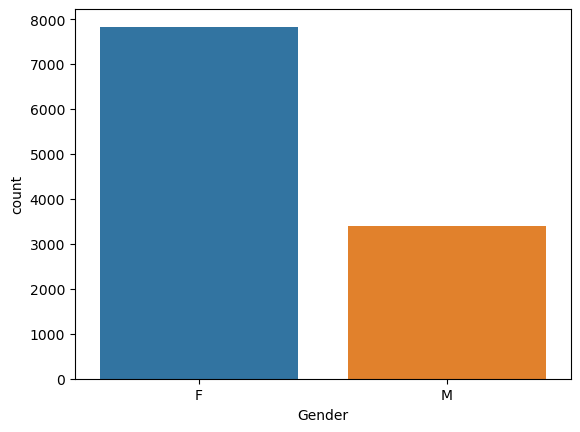

In [78]:
# Count Male and Female Customers
ax=sns.countplot(x=df["Gender"])
plt.show

In [87]:
#Count male and female customers
Female=(df["Gender"]=="F").sum()
Male=(df["Gender"]=="M").sum()

Female, Male

(7832, 3407)

In [113]:
#Purchase based on gender
sg=df.groupby("Gender")["Amount"].sum()
sg

Gender
F    74335853
M    31913276
Name: Amount, dtype: int64

In [117]:
(sg[0]/df["Amount"].sum())*100, (sg[1]/df["Amount"].sum())*100

(69.96372930266563, 30.036270697334377)

70% purchasing Done by female and 30% by Male

# Age Group

In [133]:
# Purchase based on age Group
At=df.groupby("Age Group")["Amount"].sum().sort_values(ascending=False).reset_index()
At

,Age Group,Amount
0,26-35,42613442
1,36-45,22144994
2,18-25,17240732
3,46-50,9207844
4,51-55,8261477
5,55+,4080987
6,0-17,2699653


Customers in the 26–35 age group made the highest number of purchases.

Text(0, 0.5, 'Total Amount')

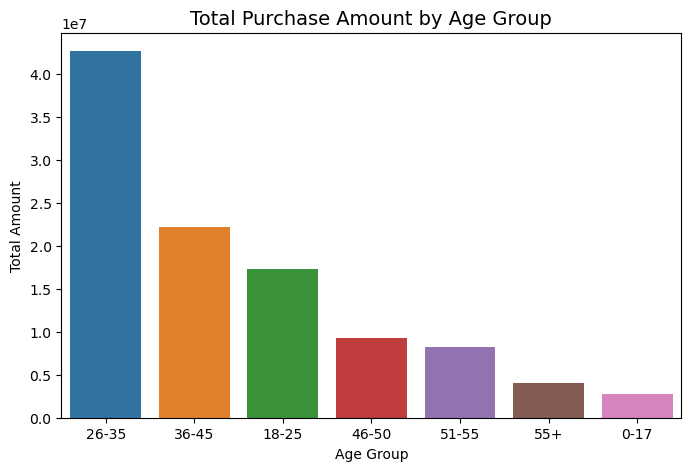

In [135]:
# Create barplot
plt.figure(figsize=(8, 5))
sns.barplot(x="Age Group", y="Amount", data=At)

# Add labels and title
plt.title("Total Purchase Amount by Age Group", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Total Amount")


In [107]:
# df["Marital_Status"].unique()

array([0, 1], dtype=int64)

In [82]:
#df.rename(columns={"User_ID":"SR_NO"})

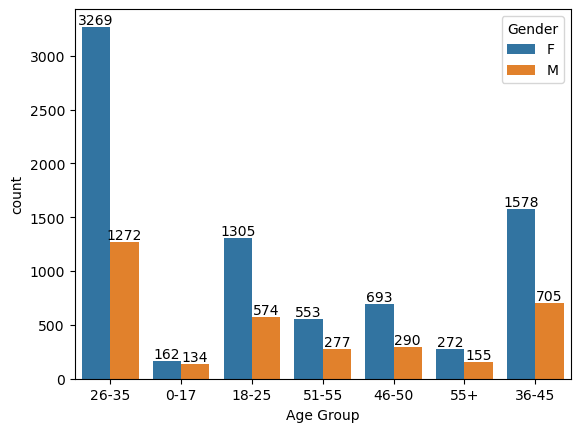

In [131]:
# Age Group VS Gender
d=sns.countplot(x="Age Group", data= df , hue="Gender")
plt.show
for bars in d.containers:
    d.bar_label(bars)

# State

In [162]:
# Number of Orders State wise 
st=df.groupby("State",)[["Orders","Amount"]].sum().sort_values(by="Amount",ascending=False).reset_index()
st

,State,Orders,Amount
0,Uttar Pradesh,4807,19374968
1,Maharashtra,3810,14427543
2,Karnataka,3240,13523540
3,Delhi,2740,11603818
4,Madhya Pradesh,2252,8101142
5,Andhra Pradesh,2051,8037146
6,Himachal Pradesh,1568,4963368
7,Haryana,1109,4220175
8,Bihar,1062,4022757
9,Gujarat,1066,3946082


<Axes: xlabel='State', ylabel='Orders'>

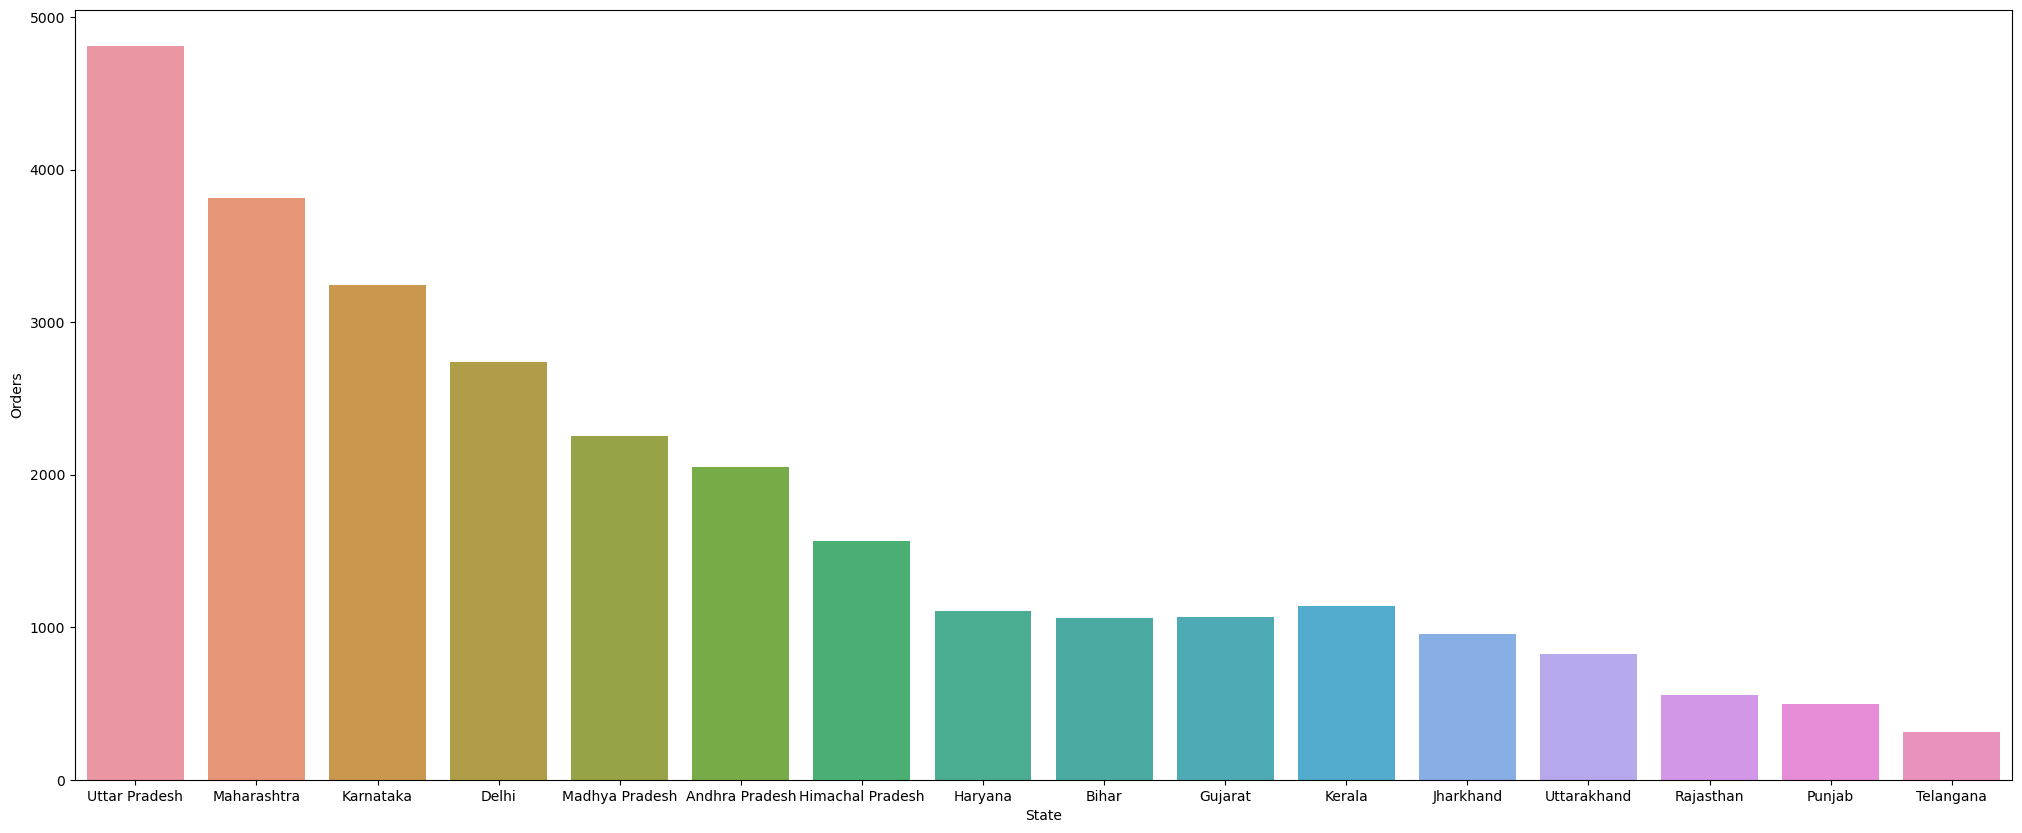

In [163]:
plt.figure(figsize=(25,10))
sns.barplot(x="State", y="Orders", data=st)

<Axes: xlabel='State', ylabel='Amount'>

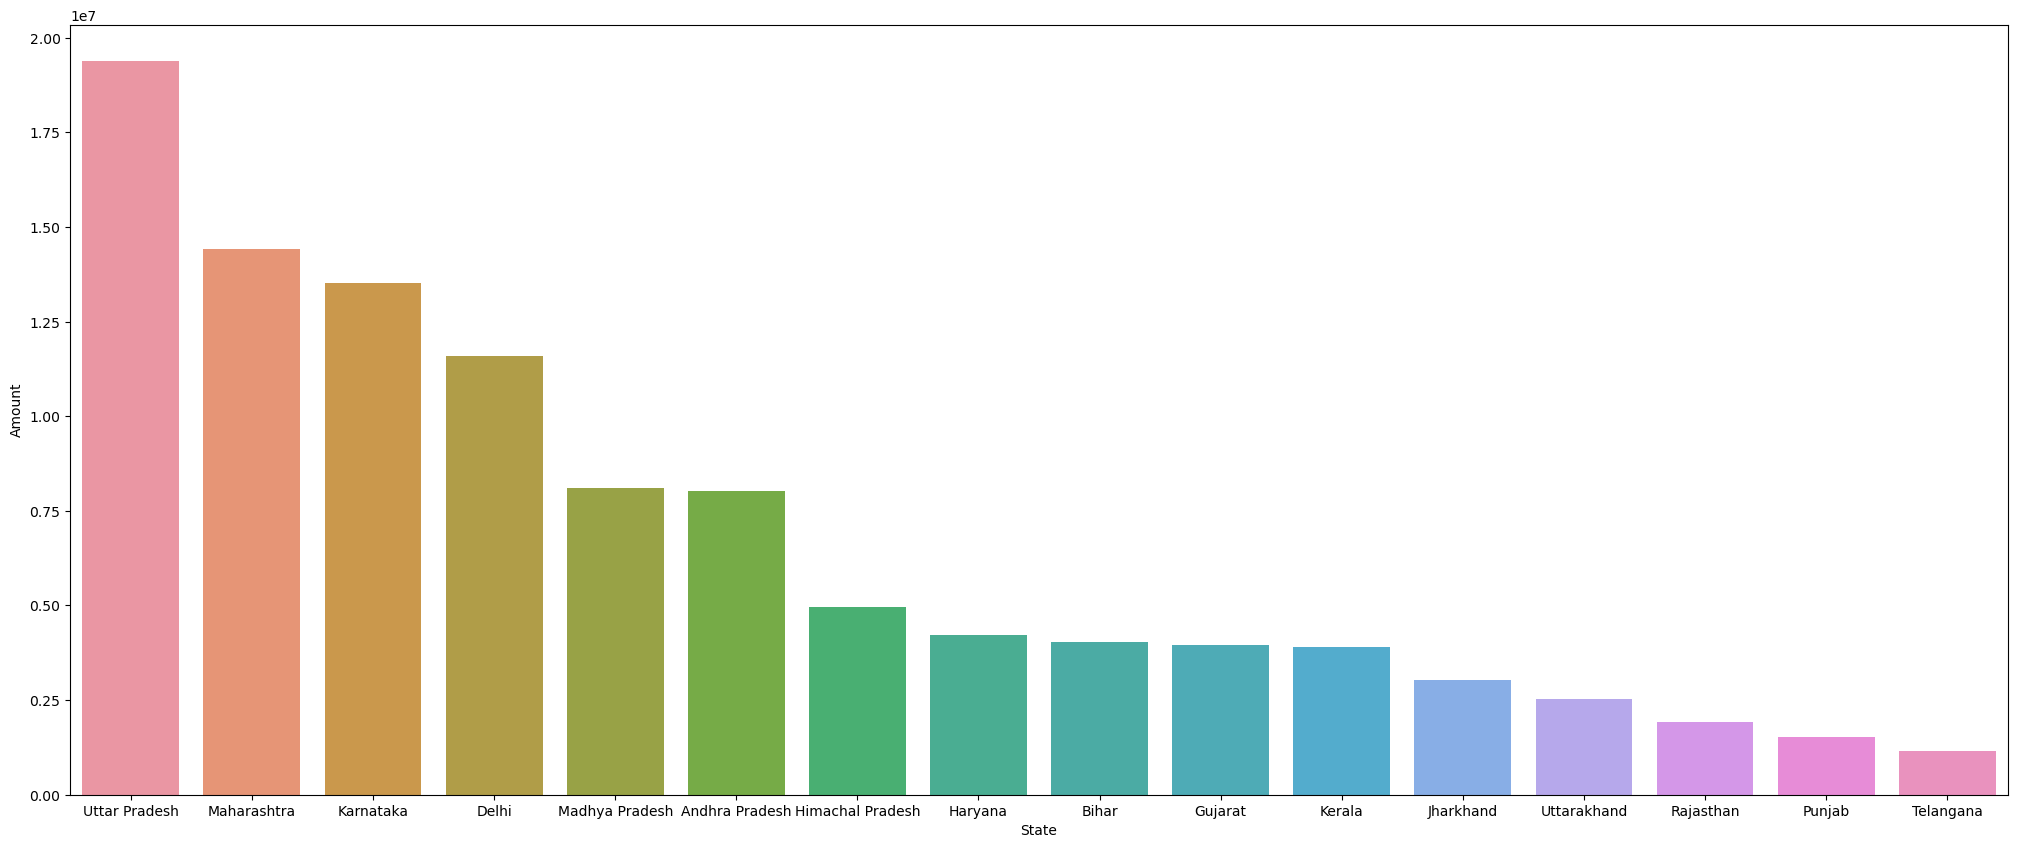

In [164]:
plt.figure(figsize=(25,10))
sns.barplot(x="State", y="Amount", data=st)

# Marital_Status

In [175]:
ms=df.groupby(["Gender","Marital_Status"])[["Amount","Orders"]].sum().reset_index()
ms

,Gender,Marital_Status,Amount,Orders
0,F,0,23952,1
1,F,1,74311901,19547
2,M,1,31913276,8433


<Axes: xlabel='Marital_Status', ylabel='Amount'>

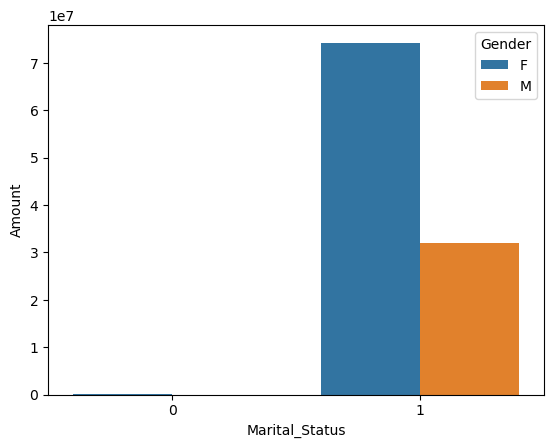

In [181]:
sns.barplot(x="Marital_Status", y="Amount", data=ms, hue='Gender')

# Occupation

In [197]:
oc=df.groupby("Occupation")["Amount"].sum().sort_values().reset_index().sort_values(by="Amount",ascending=False)
oc

,Occupation,Amount
14,IT Sector,14755079
13,Healthcare,13034586
12,Aviation,12602298
11,Banking,10770610
10,Govt,8517212
9,Hospitality,6376405
8,Media,6295832
7,Automobile,5368596
6,Chemical,5297436
5,Lawyer,4981665


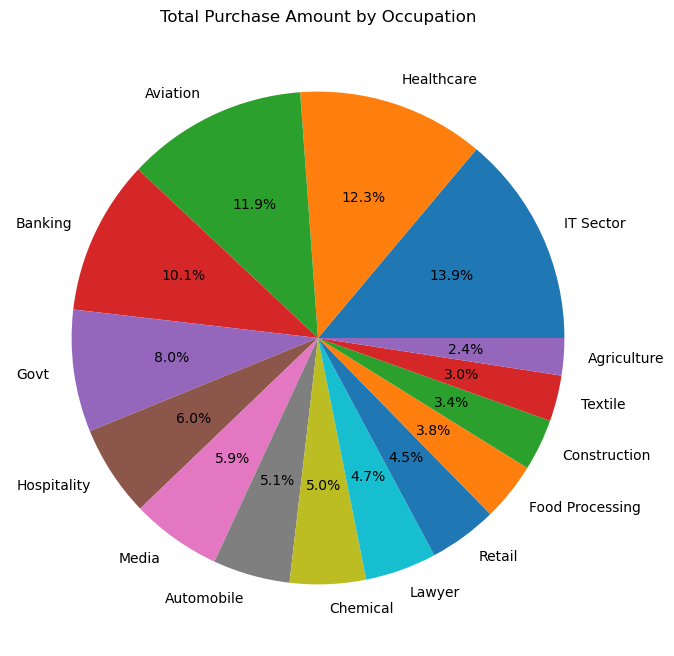

In [198]:
# Extract labels and values
labels = oc["Occupation"]
sizes = oc["Amount"]

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Total Purchase Amount by Occupation")
plt.show()

In [204]:
pc=df.groupby("Product_Category")["Amount"].sum().sort_values().reset_index().sort_values(by="Amount",ascending=False)
pc

,Product_Category,Amount
17,Food,33933883
16,Clothing & Apparel,16495019
15,Electronics & Gadgets,15643846
14,Footwear & Shoes,15575209
13,Furniture,5440051
12,Games & Toys,4331694
11,Sports Products,3635933
10,Beauty,1959484
9,Auto,1958609
8,Stationery,1676051


<Axes: xlabel='Amount', ylabel='Product_Category'>

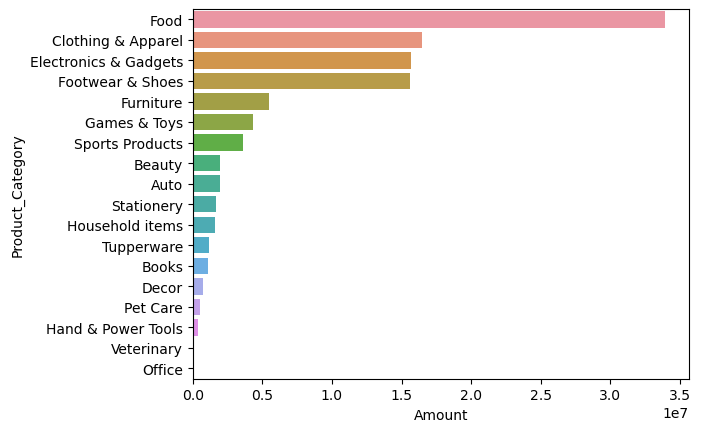

In [214]:
# plt.figure(figsize=(10,5))
sns.barplot(y="Product_Category", x="Amount", data=pc)

# Conclusion